#  <span style="color:#3366ff"> Moteur de Recommandations de films (Arnaud ROUSSEAU)

# <span style="color:#3366ff"> 29 Mai 2018 (Part 4 - Variables Mix "Alphanumériques & Numériques")

<span style="color:#3366ff"> Ce notebook est dédié à l'analyse d'une selection de variables Numériques & Alpha-numériques de la base de films "imdb-5000-movie-dataset".    


<span style="color:#3366ff"> Les 7 variables <strong>numériques </strong> conservées sont:    
<span style="color:#3366ff"> - director_facebook_likes,                              
<span style="color:#3366ff"> - cast_total_facebook_likes,                                     
<span style="color:#3366ff"> - num_critic_for_reviews,       
<span style="color:#3366ff"> - num_voted_users,                                 
<span style="color:#3366ff"> - num_user_for_reviews,     
<span style="color:#3366ff"> - imdb_score,     
<span style="color:#3366ff"> - movie_facebook_likes.    
    
    
<span style="color:#3366ff"> Les 38 variables <strong> alphanumériques </strong> sont issues de la déconcaténation de la variable <strong> "genres" </strong> (23) et <strong> "content_rating" </strong> (15).    
    
<span style="color:#3366ff"> Il y a donc 45 paramètres dans cette analyse.

### Chargement des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn import preprocessing, decomposition, cluster, metrics

### Ouverture des bases cleanées

In [2]:
data_films_clean_num_ = pd.read_csv(
    'DATA/data_films_clean_num.csv',    
    encoding='latin_1', 
    index_col=0,
    low_memory = False)

# "movie_imdb_link" n'est pas utilisé pour l'analyse, juste pour l'ID
data_films_clean_num = data_films_clean_num_.drop(['movie_imdb_link'], axis=1)

In [3]:
data_films_clean_alph = pd.read_csv(
    'DATA/data_films_clean_alph.csv',    
    encoding='latin_1', 
    index_col=0,
    low_memory = False)

In [4]:
genre_dumm = data_films_clean_alph['genres'].str.get_dummies(sep='|')

rating_dumm = data_films_clean_alph['content_rating'].str.get_dummies(sep='|')

### Fusion des bases Numériques + Alphanumériques "Genres "

In [5]:
data_films_final = pd.concat([data_films_clean_num, genre_dumm])

data_films_final = pd.concat([data_films_final, rating_dumm])

data_films_final = data_films_final.fillna(0)

In [53]:
# Cette base num mesure
shape = data_films_final.shape

print("Cette base de données Mis Alpha + Numériques contient",shape[0], 
      "Films décrits avec", shape[1], "paramètres.")

Cette base de données Mis Alpha + Numériques contient 13755 Films décrits avec 45 paramètres.


# Reduction du nombre de dimensions avec la PCA

### Essais avec 2 dimensions

In [6]:
data_films_prepro = preprocessing.scale(data_films_final)

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.10118463 0.15968812]


<span style="color:#3366ff"> Les 2 premières PC représentent 15.9% de la variance.

In [9]:
data_films_prepro_trans= pca.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 13755 Films décrits avec 2 CP.


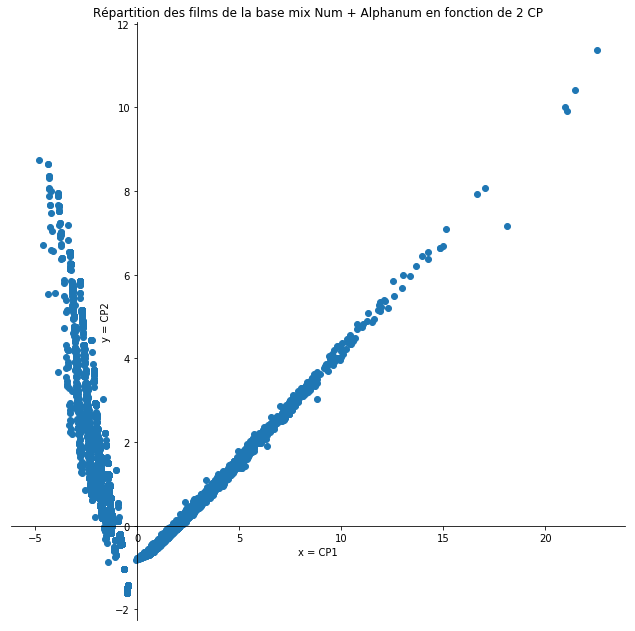

In [10]:
fig = plt.figure(figsize=(11,11))

ax = plt.subplot()
ax.set_title('Répartition des films de la base mix Num + Alphanum en fonction de 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_films_prepro_trans[:,0], data_films_prepro_trans[:,1])

<span style="color:#3366ff"> L'ensemble des fims est réparti en 2 groupes.

### Essais avec 3 dimensions

In [11]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print("Variance des 2 premieres composantes principales", 
      pca3.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.10118463 0.15968804 0.20738819]


<span style="color:#3366ff"> Les 3 premières PC représentent 20.7% de la variance.

In [13]:
data_films_prepro_trans_3= pca3.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans_3.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 13755 Films décrits avec 3 CP.


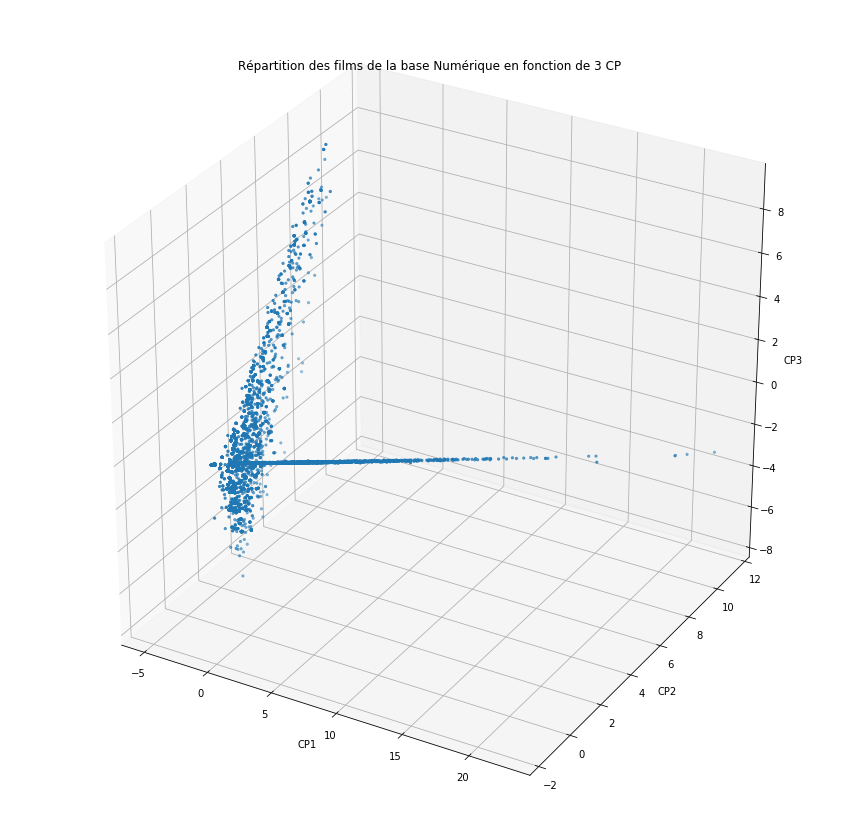

In [14]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection='3d')
p =ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           #c=data_films_clean_num.get('imdb_score'), 
           marker='.')

#fig.colorbar(p).set_label('imdb_score')


ax.set_title('Répartition des films de la base Numérique en fonction de 3 CP') 

ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')

plt.show()

<span style="color:#3366ff"> <strong> L'ensemble des films est divisé en un nuage épart et un groupe condensé.

# Recherche des variables latentes

## Affichage des contribution de chaque variable aux 2 premières Composantes Principales

(-0.3, 0.4)

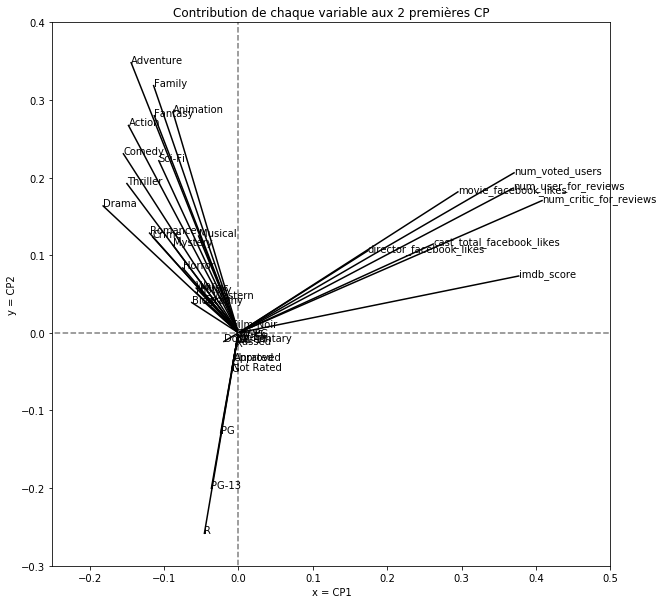

In [15]:
pcs = pca.components_

fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_films_final.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.25, 0.5])
plt.ylim([-0.3, 0.4])

<span style="color:#3366ff"> <strong>Remarque:</strong> On peut discerner des groupes :       
<span style="color:#3366ff"> - En haut à gauche: les  "genres";    
<span style="color:#3366ff"> - En bas à gauche: les "content rating";    
<span style="color:#3366ff"> - En haut à droite: les likes facbook et IMDb.    

## Affichage des contribution de chaque variable aux 3 premières Composantes Principales

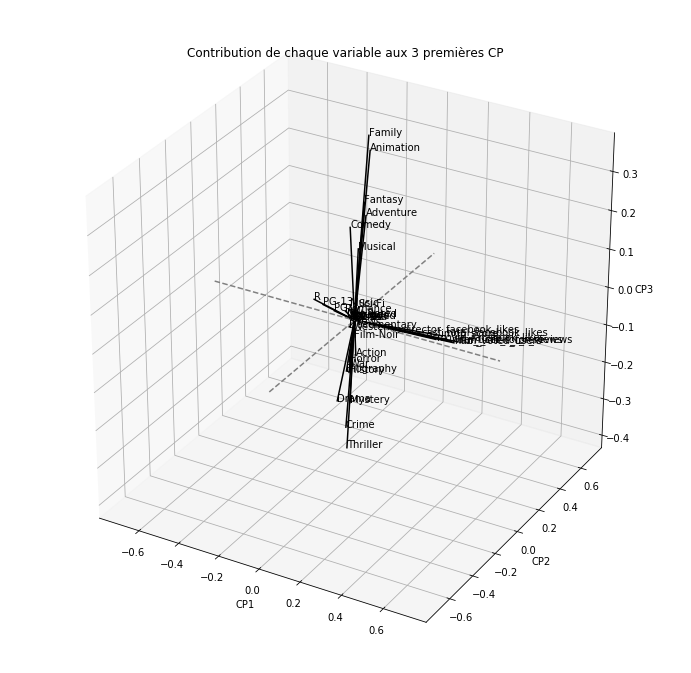

In [16]:
pcs3 = pca3.components_

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111,projection='3d')

ax.set_title('Contribution de chaque variable aux 3 premières CP')

#ax.scatter(pcs3[:,0], 
 #          pcs3[:,1], 
 #          pcs3[:,2], 
   #        c='b', marker='.')

for i , (x, y, z) in enumerate(zip(pcs3[0, :], pcs3[1, :], pcs3[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    ax.text(x, y, z, data_films_final.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
 
ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')
 
plt.show()

<span style="color:#3366ff"> <strong> Remarque:</strong> On peut discerner des groupes :    
<span style="color:#3366ff"> - En haut: les films grands publiques (comedy, famille , animation, musique);    
<span style="color:#3366ff"> - En bas: les films violents (horror, crime, action);    
<span style="color:#3366ff"> - Au milieu à droite: les likes facebook et IMDb;    
<span style="color:#3366ff"> - Au milieu à gauche: les "content rating".

# Identification de groupes de films par Clustering avec K MEANS

### Recherche du Nb de Clusters: silhouette

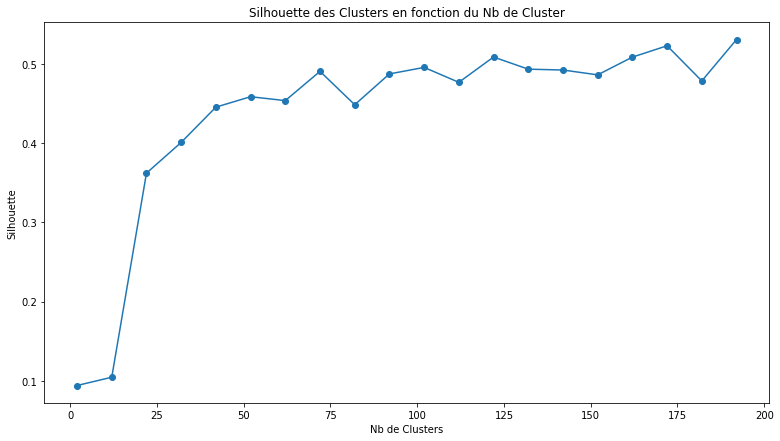

In [32]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(2,200, 10), silhouettes, marker='o')

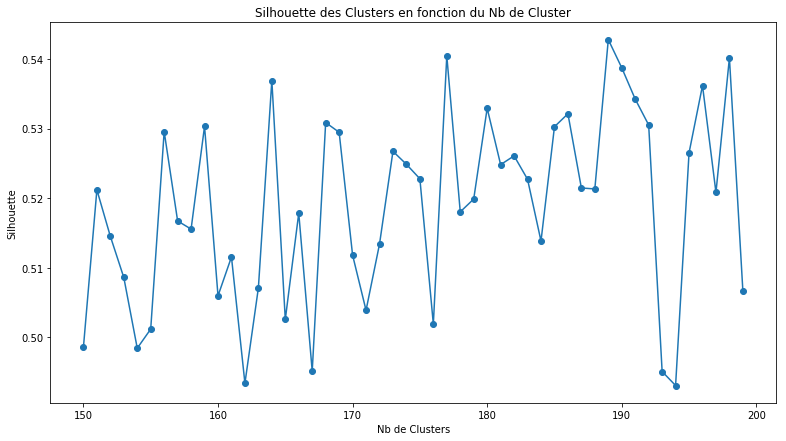

In [38]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(150,200):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(150,200), silhouettes, marker='o')

In [39]:
test  =max(silhouettes)
test

0.542779966917688

<span style="color:#3366ff"> La silouhette est la plus élevée pour N=189

### Recherche du Nb de Clusters: Calinski

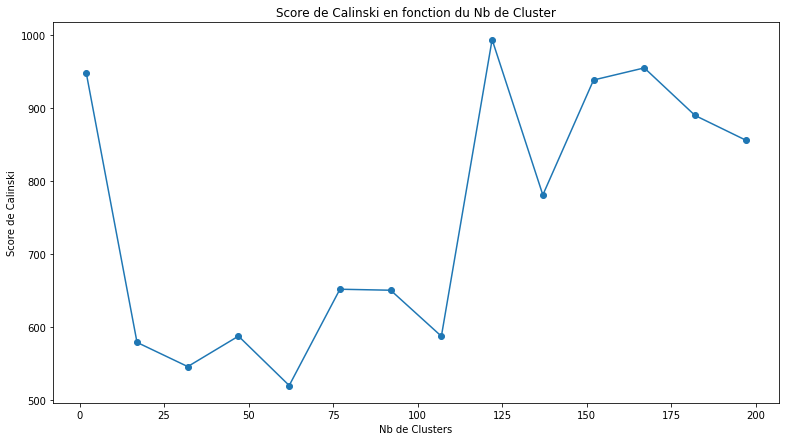

In [40]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(2,200, 15):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_kmean.labels_)
    calinski.append(cali)

plt.plot(range(2,200, 15), calinski, marker='o')

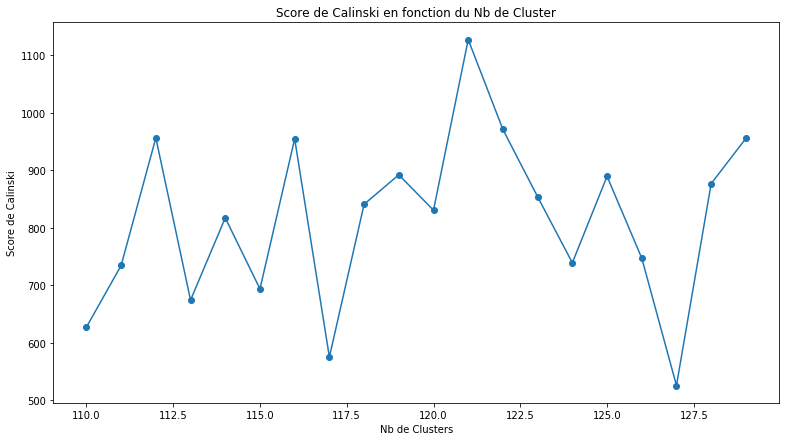

In [36]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(110,130):
    cls= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls.labels_)
    calinski.append(cali)

plt.plot(range(110,130), calinski, marker='o')

In [37]:
test = max(calinski )
test

1127.133382255306

<span style="color:#3366ff">  Le Calinski est le plus élevé pour N=121 (cal=1127)

### Affichage des Clusters du KMEANS en 2 dimensions

Text(0.5,1,'Affichage des 121 clusters K-MEANS en 2D')

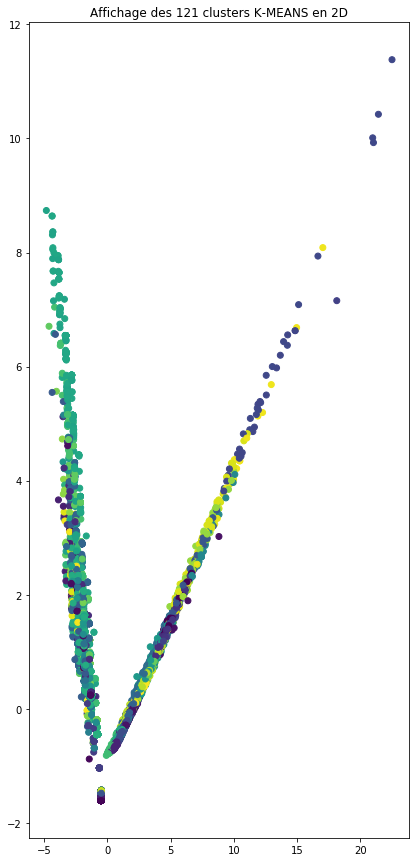

In [41]:
fig = plt.figure(figsize=(15,15))

cls_121= cluster.KMeans(121, n_init=1, init='random')
cls_121.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_121.labels_)
ax.set_title("Affichage des 121 clusters K-MEANS en 2D")

### Affichage des Clusters du K-MEANS en 3 dimensions

Text(0.5,0.92,'Affichage des 121 clusters K-MEANS  en 3D')

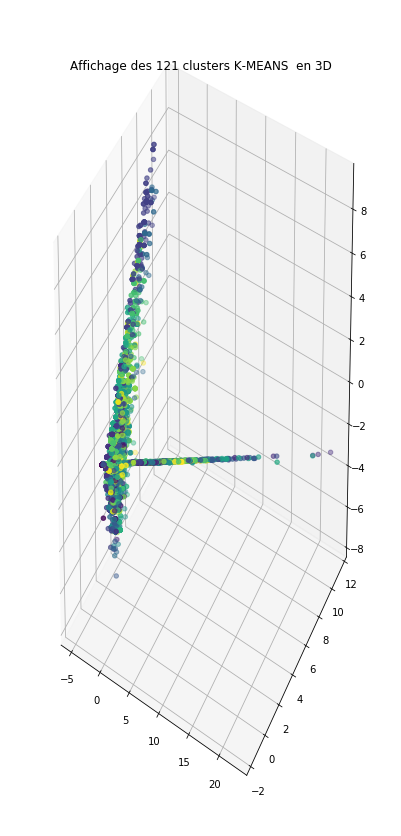

In [42]:
fig = plt.figure(figsize=(15,15))

cls_121= cluster.KMeans(121, n_init=1, init='random')
cls_121.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_121.labels_)
ax.set_title("Affichage des 121 clusters K-MEANS  en 3D")

# Conclusion Clustering par K-MEANS

<span style="color:#3366ff"> Le clustering se fera en <strong> 121 groupes </strong>.

# Identification de groupes de films par Clustering par DBSCAN

### Recherche de la variable Epsilon de DBSCAN: silhouette

plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction de Epsilon de DBSCAN, N=6')
plt.ylabel("Silhouette")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0] 

silhouettes = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

 
plt.plot(range_epsilon, silhouettes, marker='o')

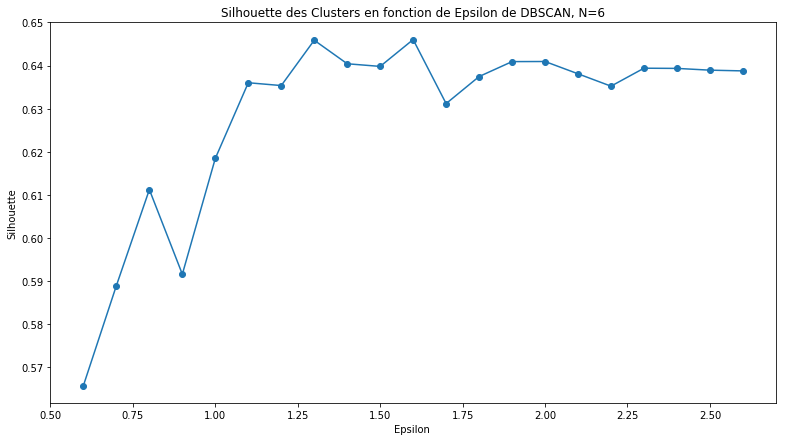

In [22]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction de Epsilon de DBSCAN, N=6')
plt.ylabel("Silhouette")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6] 

silhouettes = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

 
plt.plot(range_epsilon, silhouettes, marker='o')

In [23]:
test  =max(silhouettes)
test

0.6460272700366302

<span style="color:#3366ff"> S= 0.64 pour Eps = 1.3

### Recherche de la variable Epsilon de DBSCAN: Calinski

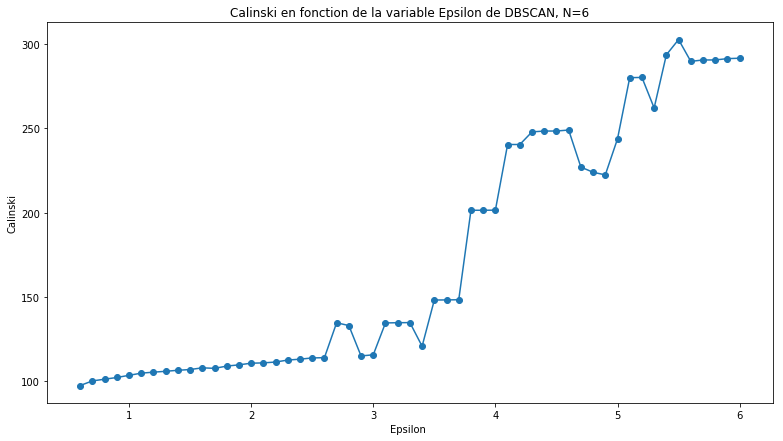

In [24]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCAN, N=6')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

In [25]:
test  =max(calinski)
test

302.6408439102839

<span style="color:#3366ff"> Cal = 302 pour Eps= 5.9 avec N=6

### Recherche du Nb de points par Cluster de DBSCAN: silhouette

plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de points par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

silhouettes = []
for min_samples_val in range(6,50):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,50), silhouettes, marker='o')

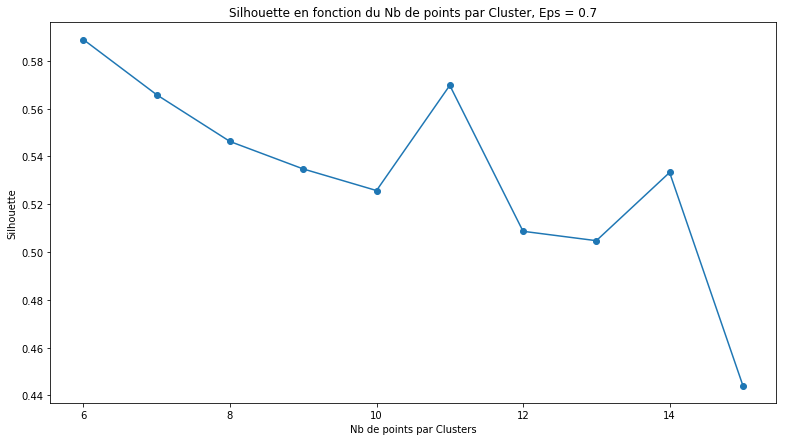

In [26]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de points par Cluster, Eps = 0.7')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

silhouettes = []
for min_samples_val in range(6,16):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,16), silhouettes, marker='o')

In [27]:
test  =max(silhouettes)
test

0.5888993642802304

<span style="color:#3366ff"> S=0.58 pour N=6 avec Eps=0.7.

### Recherche du Nb sample par Cluster de DBSCAN: Calinski

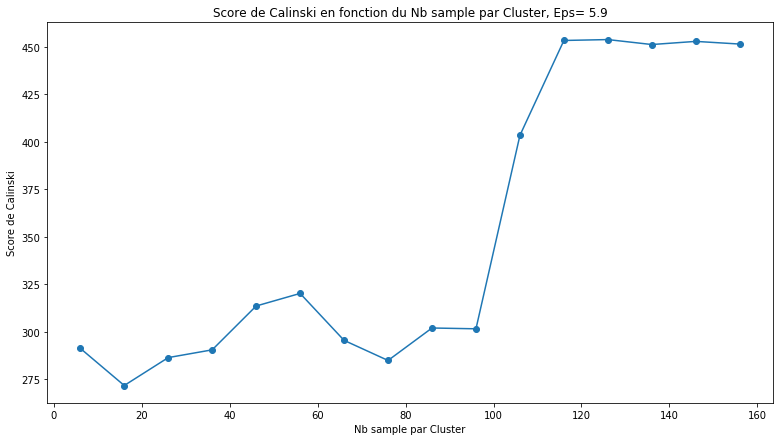

In [29]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster, Eps= 5.9')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,160,10):
    cls_dbscan= cluster.DBSCAN(eps=5.9, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,160, 10), calinski, marker='o')

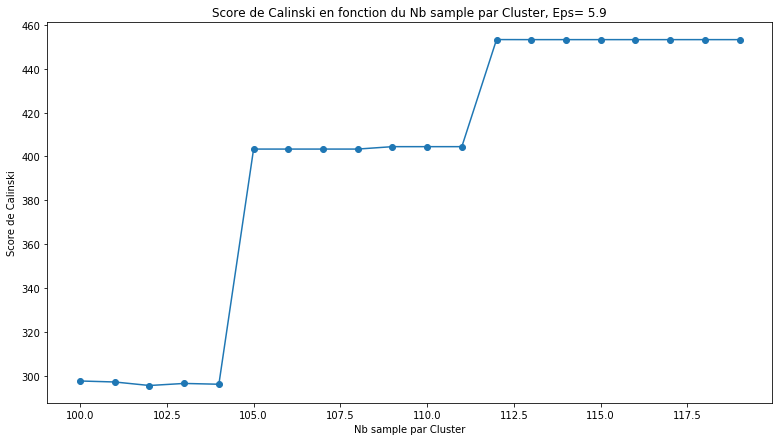

In [30]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster, Eps= 5.9')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(100,120):
    cls_dbscan= cluster.DBSCAN(eps=5.9, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(100,120), calinski, marker='o')

In [31]:
test  =max(calinski)
test

453.2949652104472

<span style="color:#3366ff"> Cal = 453 pour N=112

### Affichage des Clusters de DBSCAN en 2 dimensions

Text(0.5,1,'DBSCAN en 2D avec eps = 5.9 & MiniP = 112')

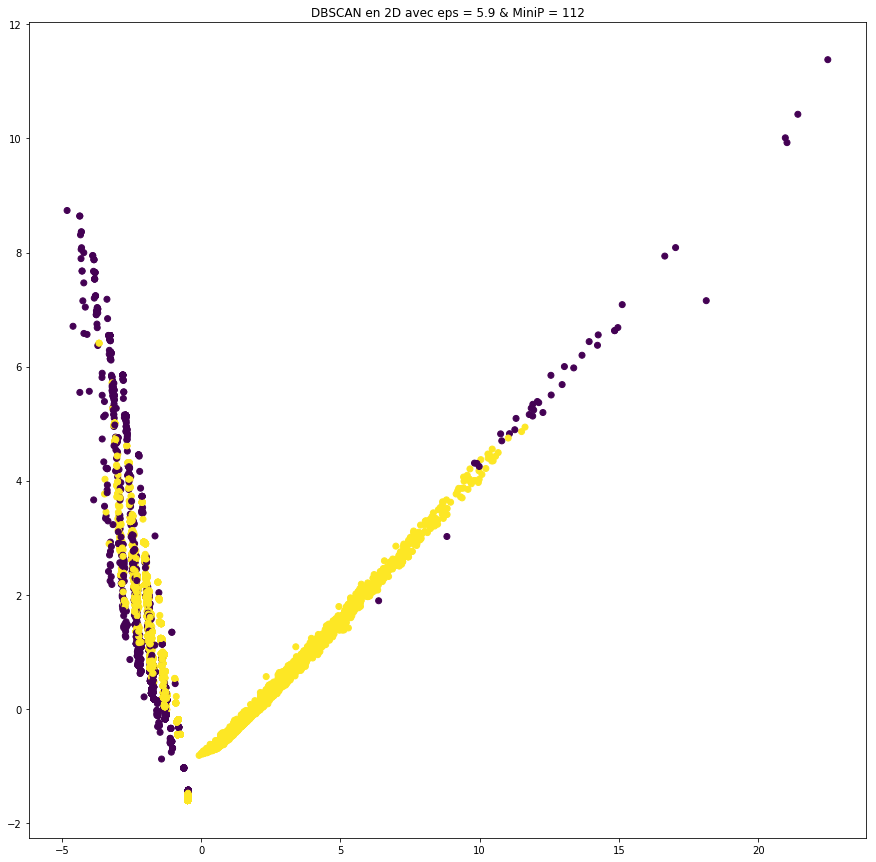

In [43]:
fig = plt.figure(figsize=(15,15))

cls_dbscan_59_112= cluster.DBSCAN(eps=5.9, 
                        min_samples=112, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_59_112.fit(data_films_prepro)
ax = fig.add_subplot(111)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_59_112.labels_)
ax.set_title("DBSCAN en 2D avec eps = 5.9 & MiniP = 112")

### Affichage des Clusters de DBSCAN en 3 dimensions

Text(0.5,0.92,'DBSCAN en 3D avec eps = 5.9 & MiniP = 112')

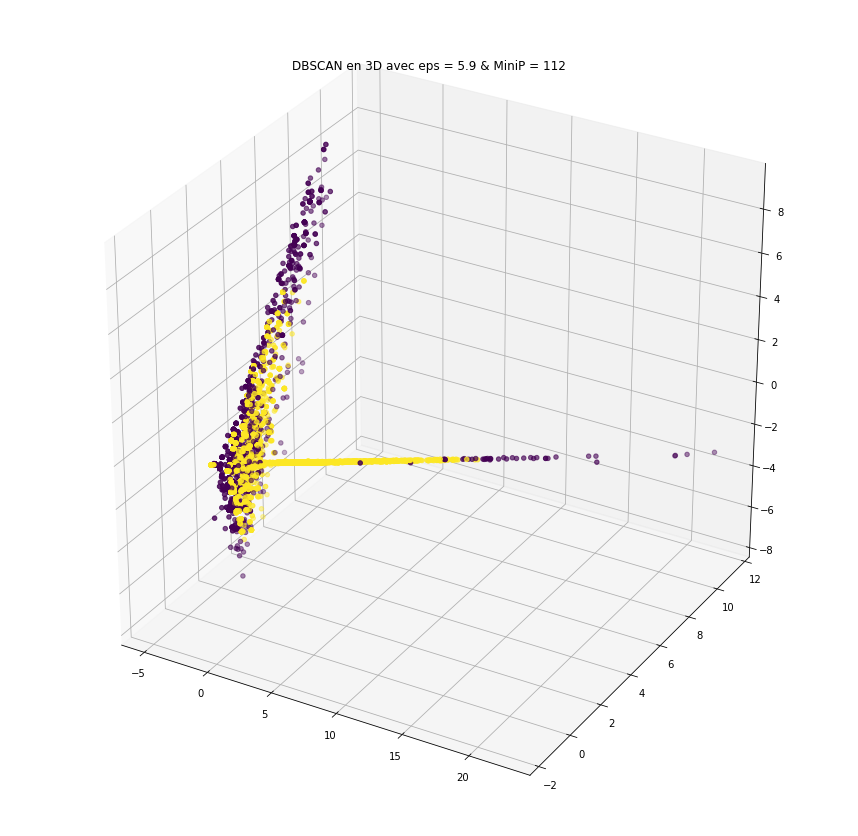

In [44]:
fig = plt.figure(figsize=(15,15))

#ax = fig.add_subplot(121,projection='3d')

cls_dbscan_59_112= cluster.DBSCAN(eps=5.9, 
                        min_samples=112, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_59_112.fit(data_films_prepro)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_59_112.labels_)
ax.set_title("DBSCAN en 3D avec eps = 5.9 & MiniP = 112")

# Identification de groupes de films par Clustering Hierarchique

<span style="color:#3366ff"> <strong> --> Le Clustering Hierarchique a un hyperparamètre: le Nb de Cluster

### CAH Recherche du Nb de Clusters: silhouette

plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,100,10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_cah.labels_)
    silhouettes.append(silh)

plt.plot(range(2,100,10), silhouettes, marker='o')

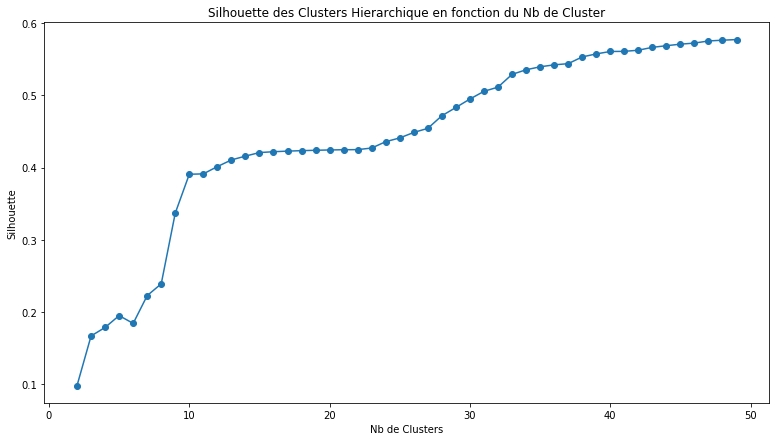

In [45]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,50):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_cah.labels_)
    silhouettes.append(silh)

plt.plot(range(2,50), silhouettes, marker='o')

In [46]:
test  =max(silhouettes)
test

0.5774541216677135

<span style="color:#3366ff"> N=49

### CAH Recherche du Nb de Clusters: Calinski

plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,50):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,50), calinski, marker='o')

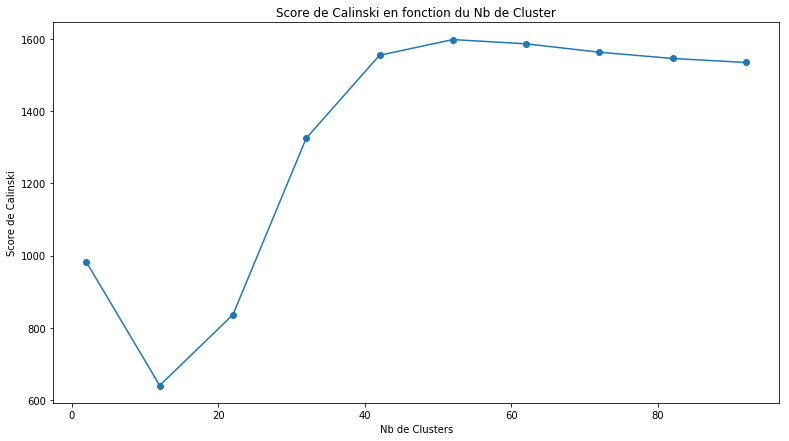

In [47]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,100, 10):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,100, 10), calinski, marker='o')

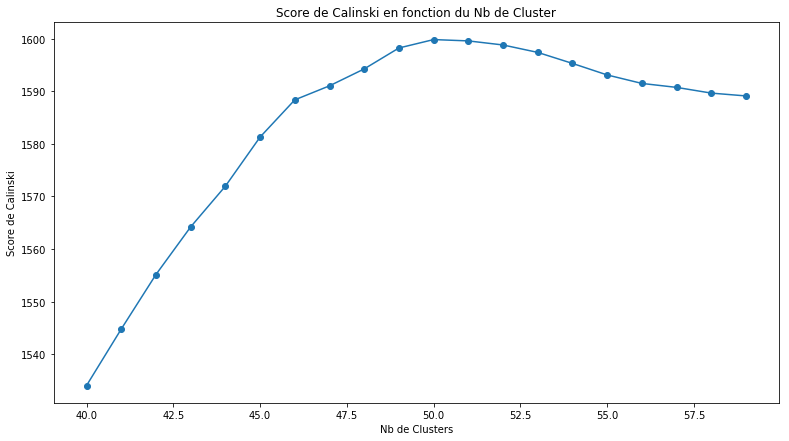

In [49]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(40, 60):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(40, 60), calinski, marker='o')

In [50]:
test  =max(calinski)
test

1599.819305235957

<span style="color:#3366ff"> Cal = 1599  pour Nb = 50.

### Affichage des Clustering Hierarchique en 2 dimensions

Text(0.5,1,'Clustering Hierarchique pour N=50 en 2D')

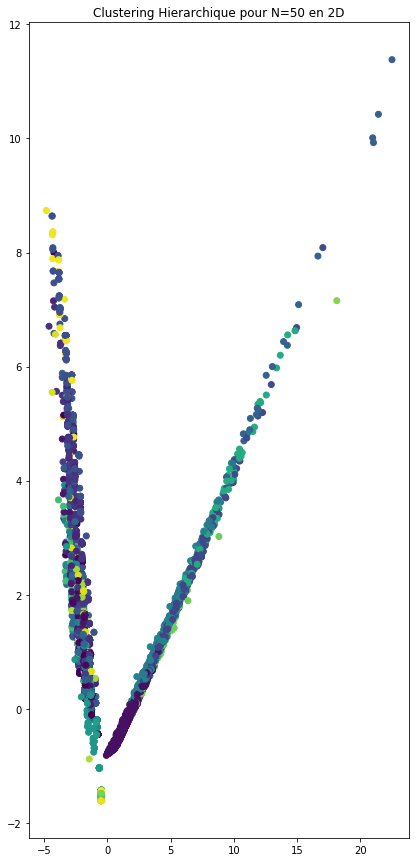

In [51]:
fig = plt.figure(figsize=(15,15))


cls_cah_50 = cluster.AgglomerativeClustering(n_clusters=50, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_50.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_cah_50.labels_)
ax.set_title("Clustering Hierarchique pour N=50 en 2D")

### Affichage des Clustering Hierarchique en 3 dimensions

Text(0.5,0.92,'Clustering Hierarchique de 50 groupes en 3D')

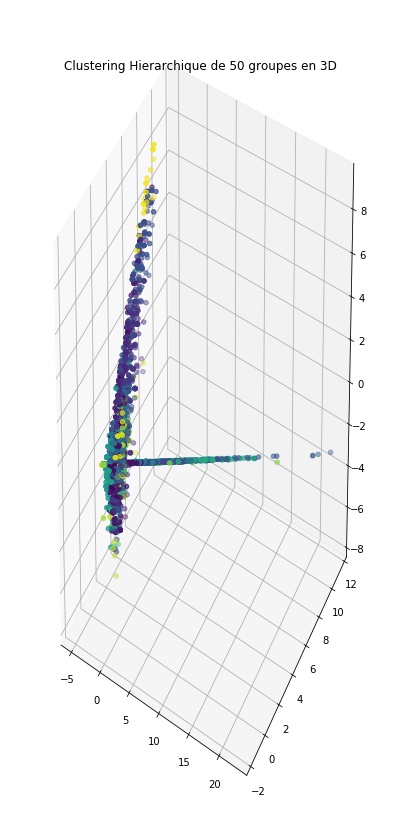

In [52]:
fig = plt.figure(figsize=(15,15))

cls_cah_50 = cluster.AgglomerativeClustering(n_clusters=50, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_50.fit(data_films_prepro)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2],
           c=cls_cah_50.labels_)
ax.set_title("Clustering Hierarchique de 50 groupes en 3D")

# Conclusion des divers méthodes de Clustering pour l'analyse Mix

<span style="color:#3366ff">  Tableau de synthèse:

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>Clustering</th>
<th>Valeurs Silhouette (S)</th>
<th>Valeurs Calinski (Cal)</th>
</tr>
<tr>
<td><strong> K-MEANS</td>
<td>Avec N = 189, S = 0.54 </td>
<td>Avec N = 121, Cal = 1127  </td>
</tr>
<tr>
<td><strong> DBSCAN</td>
<td>Avec E = 0.7, S = 0.58 pour N = 6 </td>
<td>Avec E = 5.9, Cal = 453 pour N = 112 </td>
</tr>
<tr>
<td><strong> CAH</td>
<td>Avec N = 49, S = 0.57</td>
<td>Avec N = 50, Cal = 1599</td>
</tr>    
<tr>
</table>

<span style="color:#3366ff">  <strong> Le Clustering qui a la meilleure Silhouettte et le meilleure Calinski est le CAH avec N = 50.

# Synthèse globale Clustering : Variable Num, Alphanum et Mix Alpha Num

<span style="color:#3366ff">  <strong> Le Clustering qui a la meilleure Silhouettte et le meilleure Calinski est le CAH avec N = 50.

# MOTEUR

<span style="color:#3366ff"> <strong> A partir de l’ID d’un film, le moteur va en proposer 5 autres en suivant la démarche suivantes:</strong>     
<span style="color:#3366ff"> Ouverture de la base et récupération des variables  suivantes:    
<span style="color:#3366ff"> - director_facebook_likes,     
<span style="color:#3366ff"> - cast_total_facebook_likes,     
<span style="color:#3366ff"> - num_critic_for_reviews,     
<span style="color:#3366ff"> - num_voted_users,    
<span style="color:#3366ff"> - num_user_for_reviews,    
<span style="color:#3366ff"> - imdb_score,    
<span style="color:#3366ff"> - movie_facebook_likes,    
<span style="color:#3366ff"> - Les 23 « genres » déconcaténés,    
<span style="color:#3366ff"> - Les 15 « content_rating » déconcaténés.    

<span style="color:#3366ff"> Clustering de cette base en Clustering Hiérarchique (CAH N=50);    
<span style="color:#3366ff"> Récupération du nom du film (= index) grâce à l’ID présent dans «movie_imdb_link»;    
<span style="color:#3366ff"> Récupération du Cluster de ce film;    
<span style="color:#3366ff"> Recherche des films issus de ce même Cluster;    
<span style="color:#3366ff"> Sélection aléatoire de 5 films;    
<span style="color:#3366ff"> Récupération des 5 ID.   

In [190]:
def recom(ID_film):
    ID_film = str(ID_film)
    ID_film_imdb_link = 'http://www.imdb.com/title/tt'+ID_film+'/?ref_=fn_tt_tt_1'

    base_cluster = pd.DataFrame(cls_cah_50.labels_, data_films_final.index.values, columns=['Cluster'])

    test = data_films_clean_alph[data_films_clean_alph['movie_imdb_link']==ID_film_imdb_link]
    movie_ind = test.index[0]
    #movie_ind =  movie_ind + '\xa0'
    movie_cluster = base_cluster.loc[movie_ind].values.item(0)
    films_cluster = base_cluster[base_cluster==movie_cluster]
    films_cluster = films_cluster.dropna(axis=0)
    recom = films_cluster.sample(5)

    _results=[]
    for i in recom.index:
        line={}
    
        movie_recom_name_ = i
        movie_recom_name_ = movie_recom_name_[:-1]
        line["Name"] = movie_recom_name_
    
        movie_recom_ID_ = data_films_clean_num_['movie_imdb_link'][i]
        movie_recom_ID_ = movie_recom_ID_[28:35]
        line["ID"] = movie_recom_ID_
      
        _results.append(line)
        
    return _results    

In [198]:
recom(3498820)   # ID de Captain America

[{'ID': '2975590', 'Name': 'Batman v Superman: Dawn of Justice'},
 {'ID': '1298650', 'Name': 'Pirates of the Caribbean: On Stranger Tides'},
 {'ID': '0758758', 'Name': 'Into the Wild'},
 {'ID': '2103281', 'Name': 'Dawn of the Planet of the Apes'},
 {'ID': '0945513', 'Name': 'Source Code'}]

# CONCLUSION

<span style="color:#3366ff"> Ce moteur, bien qu’imparfait, permet de proposer des films aux 1ers utilisateurs du site.

<span style="color:#3366ff"> Pour cela il utilise les variables suivants de la base de donnée IMDb:    
<span style="color:#3366ff"> - director_facebook_likes,    
<span style="color:#3366ff">- cast_total_facebook_likes,    
<span style="color:#3366ff"> - num_critic_for_reviews,    
<span style="color:#3366ff"> - num_voted_users,    
<span style="color:#3366ff"> - num_user_for_reviews,    
<span style="color:#3366ff"> - imdb_score,    
<span style="color:#3366ff"> - movie_facebook_likes    
<span style="color:#3366ff"> - Les 23 « genres » déconcaténés,    
<span style="color:#3366ff"> - Les 15 « content_rating » déconcaténés.    

<span style="color:#3366ff"> <strong> Inconvénient de ce moteur: </strong>      
<span style="color:#3366ff">     - système basé sur un "petit" clustering     
<span style="color:#3366ff">     - les films les plus vieux sont moins populaires sur facebook -> biais     